In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=f2a84752cdb11974dbd3c55c0c76adb9dc71d68c9a4c713c3bb4aaad8040ef90
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [67]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator

In [68]:
# Parameters
epoch=2
batch_size=32
learning_rate=0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_used = tf.keras.losses.CategoricalCrossentropy()

In [69]:
from medmnist import DermaMNIST

In [70]:
# Loading the dataset
train_dataset=DermaMNIST(split='train', download=True)
print(train_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [71]:
print('Number of samples in the training set:', len(train_dataset))
print('First sample:', train_dataset[0])
print('First element in the first sample:',train_dataset[0][0])
print('Second element in the first sample', train_dataset[0][1])

Number of samples in the training set: 7007
First sample: (<PIL.Image.Image image mode=RGB size=28x28 at 0x7B0E949FF520>, array([0]))
First element in the first sample: <PIL.Image.Image image mode=RGB size=28x28 at 0x7B0E949DF5E0>
Second element in the first sample [0]


In [72]:
def montage(self, length=20, replace=False, save_folder=None):
        from medmnist.utils import montage2d

        n_sel = length * length
        sel = np.random.choice(self.__len__(), size=n_sel, replace=replace)

        montage_img = montage2d(imgs=self.imgs,
                                n_channels=self.info['n_channels'],
                                sel=sel)

        if save_folder is not None:
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)
            montage_img.save(os.path.join(save_folder,
                                          f"{self.flag}_{self.split}_montage.jpg"))

        return montage_img

In [73]:
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


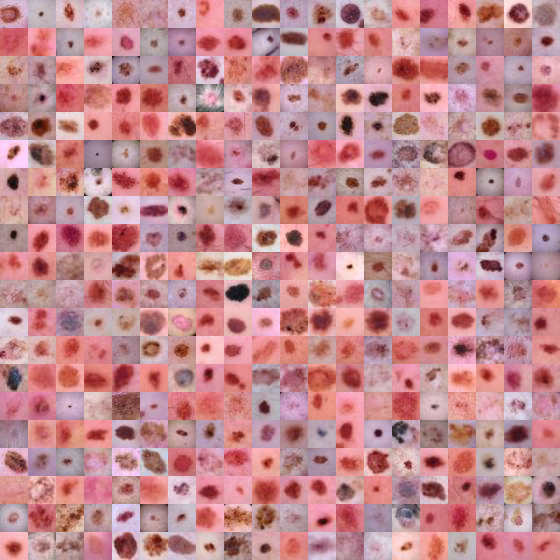

In [74]:
train_dataset.montage(length=20)

In [75]:
x,y = train_dataset[0]
print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [81]:
print(len(train_dataset))
class_count = [0,0,0,0,0,0,0]
for i in range(0,len(train_dataset)):
  x,y = train_dataset[i]
  class_count[y[0]]+=1
print(class_count)

7007
[228, 359, 769, 80, 779, 4693, 99]


In [82]:
from PIL import Image
im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [83]:
no_of_class = 7
def read_data(data):
  x,y = data[0]
  x = np.array(x)
  data_x_new = np.zeros((len(data),x.shape[0],x.shape[1],x.shape[2]),dtype=float)
  data_y_new = np.zeros((len(data),no_of_class),dtype=float)
  for i in range(0,len(data)):
    x,y = data[i]
    x_new = np.asarray(x)
    y_new = np.zeros(no_of_class,dtype=float)
    y_new[y[0]] = 1
    data_x_new[i]=x_new
    data_y_new[i]=y_new
  return data_x_new,data_y_new

In [84]:
train_x, train_y = read_data(train_dataset)
print(train_x.shape,train_y.shape)

(7007, 28, 28, 3) (7007, 7)


In [85]:
print(train_x[0])
print(train_y[0])

[[[158. 111. 117.]
  [161. 116. 121.]
  [164. 121. 130.]
  ...
  [189. 160. 164.]
  [187. 158. 160.]
  [186. 157. 159.]]

 [[160. 113. 119.]
  [165. 120. 125.]
  [170. 129. 137.]
  ...
  [191. 162. 166.]
  [189. 160. 162.]
  [188. 159. 161.]]

 [[164. 119. 124.]
  [170. 128. 132.]
  [177. 137. 145.]
  ...
  [191. 162. 166.]
  [188. 162. 165.]
  [187. 161. 164.]]

 ...

 [[172. 142. 150.]
  [176. 147. 152.]
  [182. 150. 155.]
  ...
  [195. 167. 164.]
  [181. 153. 150.]
  [171. 143. 140.]]

 [[176. 147. 152.]
  [176. 147. 152.]
  [180. 148. 153.]
  ...
  [188. 160. 157.]
  [178. 150. 147.]
  [171. 143. 140.]]

 [[175. 146. 151.]
  [173. 144. 149.]
  [174. 142. 147.]
  ...
  [180. 152. 149.]
  [175. 147. 144.]
  [173. 145. 142.]]]
[1. 0. 0. 0. 0. 0. 0.]


In [86]:
# VALIDATION SET
val_dataset = DermaMNIST(split='val', download=True)
print(val_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 1003
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [87]:
x,y = val_dataset[0]
print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [88]:
print(len(val_dataset))
class_count = [0,0,0,0,0,0,0,0]
for i in range(0,len(val_dataset)):
  x,y = val_dataset[i]
  class_count[y[0]]+=1
print(class_count)

1003
[33, 52, 110, 12, 111, 671, 14, 0]


In [89]:
from PIL import Image
im = np.asarray(val_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [90]:
val_x, val_y = read_data(val_dataset)
print(val_x.shape,val_y.shape)

(1003, 28, 28, 3) (1003, 7)


In [91]:
# TEST SET
test_dataset = DermaMNIST(split='test', download=True)
print(test_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 2005
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [92]:
x, y = test_dataset[0]
print(np.array(x).shape, y.shape)
print(y)

(28, 28, 3) (1,)
[5]


In [94]:
print(len(test_dataset))
class_count = [0,0,0,0,0,0,0]
for i in range(0,len(test_dataset)):
  x,y = test_dataset[i]
  class_count[y[0]]+=1
print(class_count)

2005
[66, 103, 220, 23, 223, 1341, 29]


In [95]:
test_x, test_y = read_data(test_dataset)
print(test_x.shape,test_y.shape)

(2005, 28, 28, 3) (2005, 7)


In [101]:
# NEURAL NETWORKS
from tensorflow.keras import models, layers
input_layers = layers.Input(shape=(28,28,3,))
y = layers.Flatten()(input_layers)
y = layers.Dense(1024,activation=tf.nn.relu)(y)
y = layers.Dense(512,activation=tf.nn.relu)(y)
y = layers.Dense(256,activation=tf.nn.relu)(y)
y = layers.Dense(128,activation=tf.nn.relu)(y)
y = layers.Dense(64,activation=tf.nn.relu)(y)
y = layers.Dense(32,activation=tf.nn.relu)(y)
y = layers.Dense(16,activation=tf.nn.relu)(y)
output_layers = layers.Dense(7,activation='softmax')(y)
nn_model = tf.keras.Model(inputs = input_layers, outputs = output_layers)

In [102]:
nn_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 2352)              0         
                                                                 
 dense_36 (Dense)            (None, 1024)              2409472   
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 64)                8256

In [103]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [104]:
nn_history = nn_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

Epoch 1/2
219/219 [==============================] - 12s 47ms/step - loss: 13.3976 - accuracy: 0.5346 - val_loss: 1.8024 - val_accuracy: 0.6690
Epoch 2/2
219/219 [==============================] - 10s 46ms/step - loss: 1.7178 - accuracy: 0.6698 - val_loss: 1.6367 - val_accuracy: 0.6690


In [105]:
score = nn_model.evaluate(test_x, test_y, verbose = 0)
print(score)
print("Test Accuracy:", score[1])

[1.6367878913879395, 0.6688279509544373]
Test Accuracy: 0.6688279509544373


In [107]:
# VGG
from tensorflow.keras import models, layers
vgg_model = tf.keras.Sequential()
vgg_model.add(layers.Input((28,28,3)))
vgg_model.add(layers.ZeroPadding2D((2,2)))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096,activation='relu'))
vgg_model.add(layers.Dense(256,activation='relu'))
vgg_model.add(layers.Dense(7,activation='softmax'))

In [108]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [109]:
vgg_history = vgg_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

Epoch 1/2
219/219 [==============================] - 179s 808ms/step - loss: 1.3085 - accuracy: 0.6669 - val_loss: 0.9408 - val_accuracy: 0.6790
Epoch 2/2
219/219 [==============================] - 173s 788ms/step - loss: 0.9405 - accuracy: 0.6735 - val_loss: 0.9054 - val_accuracy: 0.6849


In [110]:
score = vgg_model.evaluate(test_x, test_y, verbose = 0)
print(score)
print("Test Accuracy:", score[1])

[0.8911707997322083, 0.6852867603302002]
Test Accuracy: 0.6852867603302002


In [111]:
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 32, 32, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

In [113]:
# ResNet
from tensorflow.keras import models, layers
from tensorflow.keras.applications import resnet50

In [114]:
input_layer=layers.Input(shape=(28,28,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=True)
resnet_model.summary()
last_layer = resnet_model.get_layer('avg_pool').output

                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                              
                                                                                                  
 conv1_relu (Activation)     (None, 14, 14, 64)           0         ['conv1_bn[0][0]']            
                                                                                                  
 pool1_pad

In [115]:
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(no_of_class,activation='softmax')(flatten)
rs50_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [116]:
rs50_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [117]:
rs50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [118]:
rs50_history = rs50_model.fit(train_x,train_y,epochs=epoch-1,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

219/219 [==============================] - 488s 2s/step - loss: 1.1321 - accuracy: 0.6886 - val_loss: 3.8400 - val_accuracy: 0.6530


In [119]:
score = rs50_model.evaluate(test_x, test_y, verbose = 0)
print(score)
print("Test Accuracy:", score[1])

[5.108697414398193, 0.6568578481674194]
Test Accuracy: 0.6568578481674194
